<a href="https://colab.research.google.com/github/Roshan4151/Roshan-Alte---Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Roshan_Alte_Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Yes Bank Stock Closing Price Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -**            Roshan Alte


# **Project Summary -**

Yes Bank stock closing price prediction by regression involves using historical data to develop a regression model that can forecast future stock prices. Regression analysis is a statistical method that uses a combination of independent variables to predict the value of a dependent variable, in this case, the stock price.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The problem statement for developing a Yes Bank stock closing price prediction ML model is to create an accurate and reliable forecasting model. The goal is to provide investors with a tool that can assist them in making informed decisions Yes Bank stocks. The model should be trained on a subset of historical data and validated on another subset to ensure that it can accurately predict future stock prices. The ultimate objective is to create a robust and accurate model that can help investors make informed decisions and maximize their returns on investments in Yes Bank stocks.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [286]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

import datetime

### Dataset Loading

In [287]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [288]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Yes Bank Project (Regression)/data_YesBank_StockPrices.csv')

### Dataset First View

In [289]:
# Dataset First Look
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [290]:
# Tail of the Dataset
data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [291]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [292]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [293]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [294]:
# Missing Values/Null Values Count
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### What did you know about your dataset?

  According to the analysis above, the dataset comprises 185 rows and 5 columns. where just one column i.e,Date is in object format and the others are formatted as float. This data does not contain any Null values or duplicate rows

## ***2. Understanding Your Variables***

In [295]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [296]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

1.  There are 5 variable in data as follows

   **a) Independent Variable -**

  1. Date : It has Month and Year.
  2. Open : Opening stock price for respective Month.
  3. High : Highest sotck price for respective Month.
  4. Low : Lowest stock price for respective Month.

   **b) Dependent Variable -**
  5. Close : Closing price of Stock for respective Month

### Check Unique Values for each variable.

In [297]:
# Check Unique Values for each variable.
data.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [298]:
# Write your code to make your dataset analysis ready.
data['Date'] = pd.to_datetime(data['Date'],format='%b-%y')

In [299]:
data['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [300]:
data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [301]:
# Storing the Numeric features in seperate variable
num_fea = data.describe().columns
num_fea

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

### What all manipulations have you done and insights you found?

1.   Here, I have converted the Date column into Date format by using the Datetime Library for the better understanding and better visualization of relationship between Data and Closing Price.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

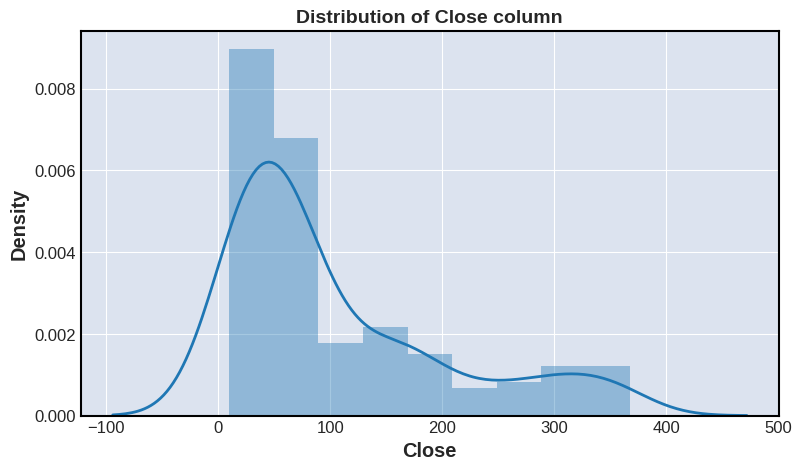

In [302]:
# Chart 1 - Visualization code for Distribution of Close column
plt.figure(figsize=(9,5))
sns.distplot(data['Close'])
plt.title("Distribution of Close column",fontweight='bold',fontsize=14)
plt.xlabel("Close",fontweight='bold')
plt.ylabel("Density",fontweight='bold')
plt.show()

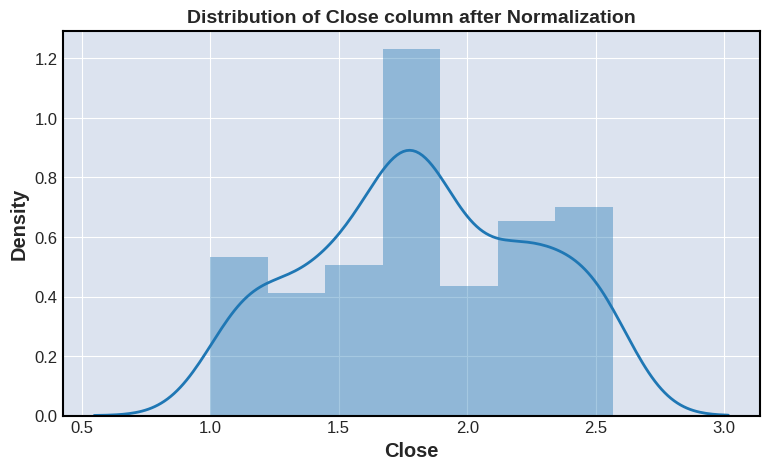

In [303]:
# Normalizing the Close column by using the Log transformation
plt.figure(figsize=(9,5))
sns.distplot(np.log10(data['Close']))
plt.title("Distribution of Close column after Normalization",fontweight='bold',fontsize=14)
plt.xlabel("Close",fontweight='bold')
plt.ylabel("Density",fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

* I have picked this specific chart to check the distribution of Close column.



##### 2. What is/are the insight(s) found from the chart?



1.   The Close column will be used as a Target variable and one assumption in Linear Regression is that the data should follow Normal Distribution.From the above first graph you can see that the Close column is Positively Skewed.
2.   Skewed datasets are not good for ML models so we have used the Log transformation to normalize the data and to obtain the best fit ML models.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are not any insights that lead to negative growth.

#### Chart - 2

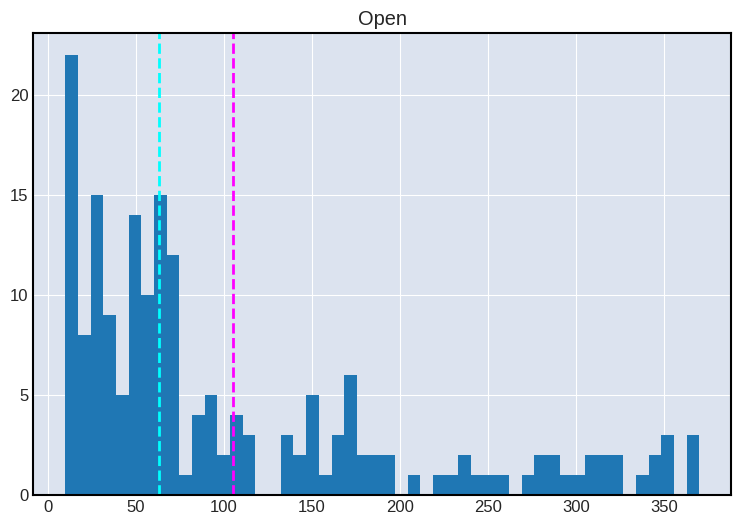

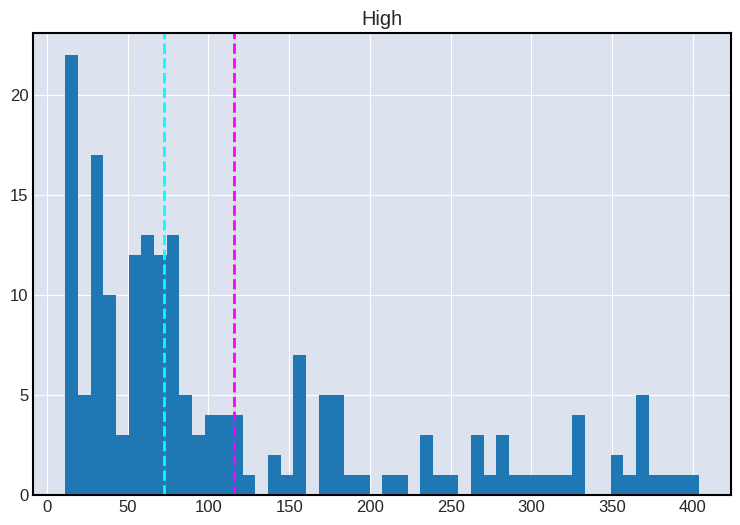

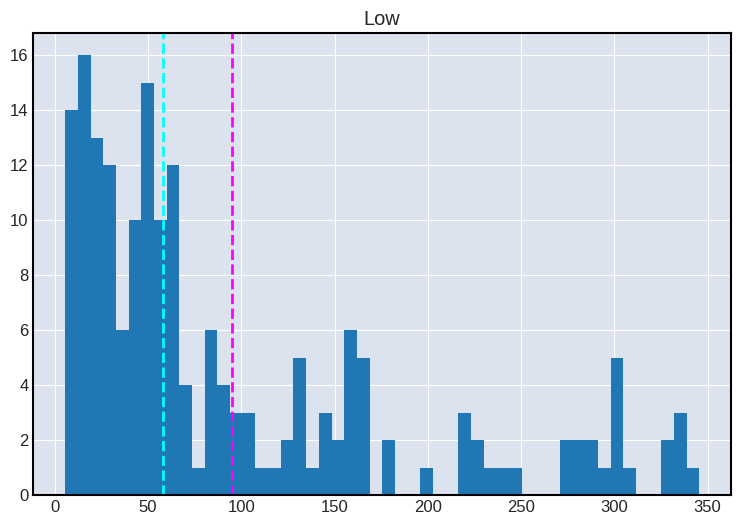

In [304]:
# Chart 2 - Visualization code for plotting Histogram for all Independent Variables from the data
for col in num_fea[:-1]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = data[col]
  feature.hist(bins=50)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

*  I have picked this specific chart to check the distribution of data in the Independent Variables.We also plotted mean and median lines for better understanding of skewness of data.

##### 2. What is/are the insight(s) found from the chart?

1.   The shape of the distribution of independent variables skewed right. This information can help to determine the appropriate statistical approach for regression.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are not any insights that lead to negative growth.

#### Chart - 3

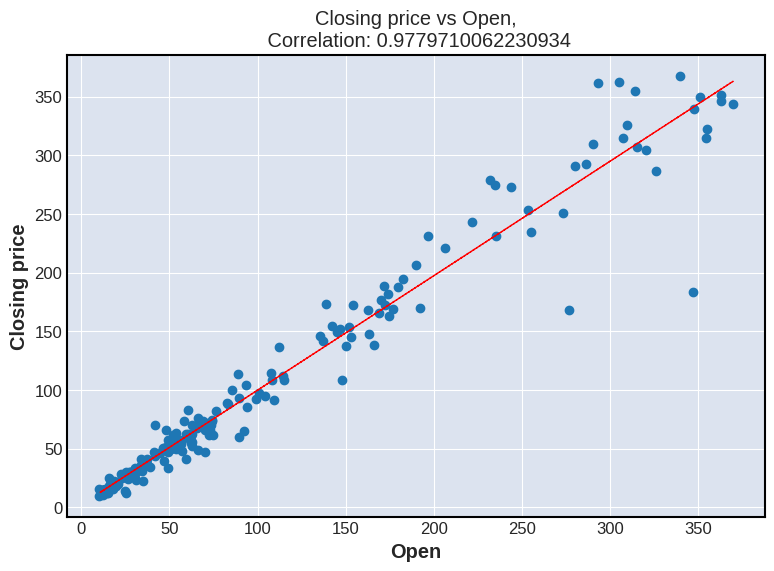

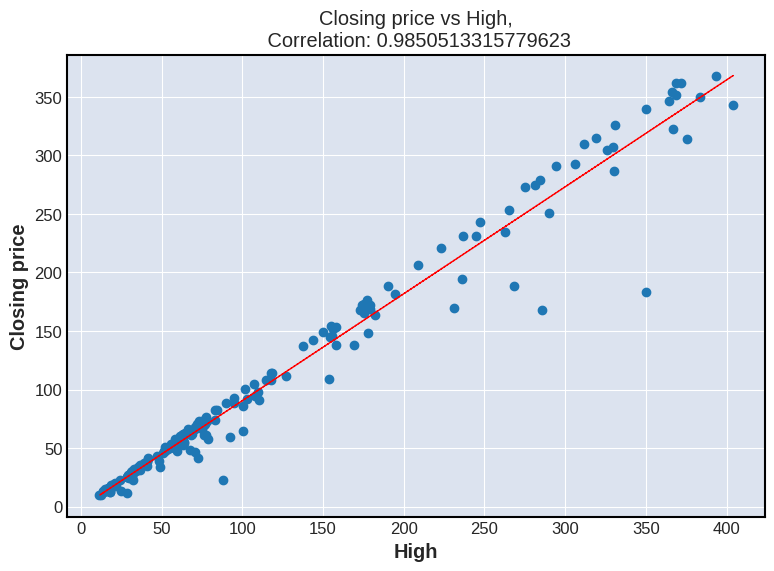

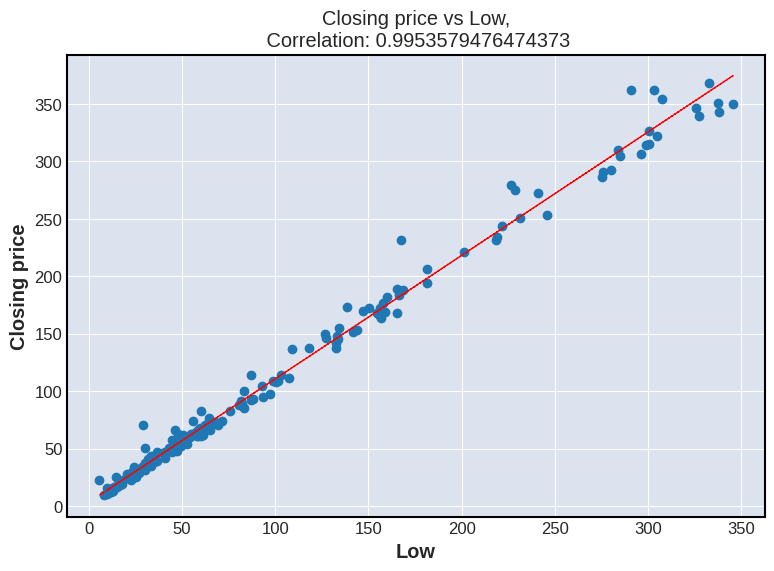

In [305]:
# Chart 3 - Visualization code for Scatter plot between Dependent variables and Independent variable
for col in num_fea[:-1]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=data[col]
  label=data["Close"]
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.ylabel("Closing price")
  plt.xlabel(col)
  ax.set_title('Closing price vs '+col+',\n Correlation: '+str(correlation))
  z=np.polyfit(data[col],data['Close'],1)
  y_hat=np.poly1d(z)(data[col])

  plt.plot(data[col],y_hat,"r--",lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

*   I picked this specific chart to check the relationshio between Independent variable and Dependent variable.

##### 2. What is/are the insight(s) found from the chart?

1.  From the above graph you can clearly see that our Independent variables are Linearly correlated with Dependent variable(Closing Price).
2.  Among the given Independent variables the Variable named as Low is highly linearly correlated with Dependent variable(Close Column).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 4

The correlation score between High and Low 0.9834220453868542


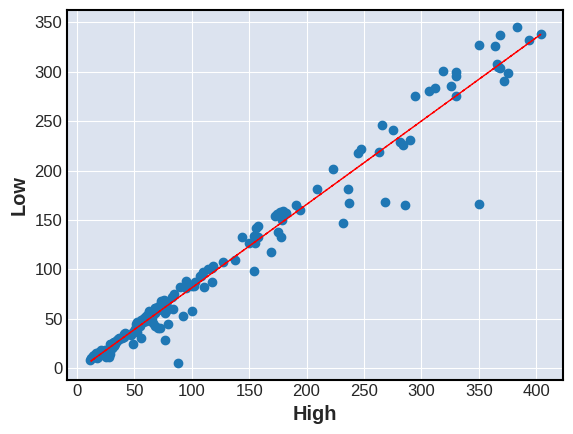

In [306]:
# Chart 4 - Visualization code for Correlationship between High and Low
plt.scatter(data['High'],data['Low'])
correlation = data['High'].corr(data['Low'])
z=np.polyfit(data['High'],data['Low'],1)
y_hat=np.poly1d(z)(data['High'])
plt.plot(data['High'],y_hat,"r--",lw=1)
plt.xlabel('High')
plt.ylabel('Low')
print(f'The correlation score between High and Low {correlation}')

##### 1. Why did you pick the specific chart?

I picked this specific scatter plot to check there is Collinearity exists between High and Low prices.

##### 2. What is/are the insight(s) found from the chart?

1.  From the above chart you can clearly see that the there is high correlation between High and Low columns.
2.  So we can say that in our data, Multicollinearity exists.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 5

In [307]:
# Setting Date as index
df = data.copy()
df = df.set_index('Date')
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [308]:
# plotting the given data for stock analysis
!pip install --upgrade mplfinance
import mplfinance as mpf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


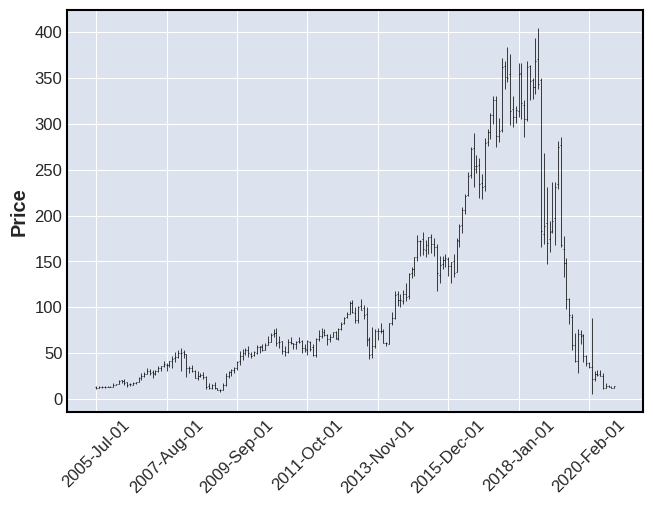

In [309]:
mpf.plot(df)

##### 1. Why did you pick the specific chart?

*  I picked this specific chart to plot overall Price Action of Yes Banks stock.

##### 2. What is/are the insight(s) found from the chart?

1.  From December 2015, the stock started Manupulating heavily.There must be a Fundamental news behind this manupulation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are not any insights that lead to negative growth.

#### Chart - 6

Text(0.5, 1.0, 'Overall graph of Close Price')

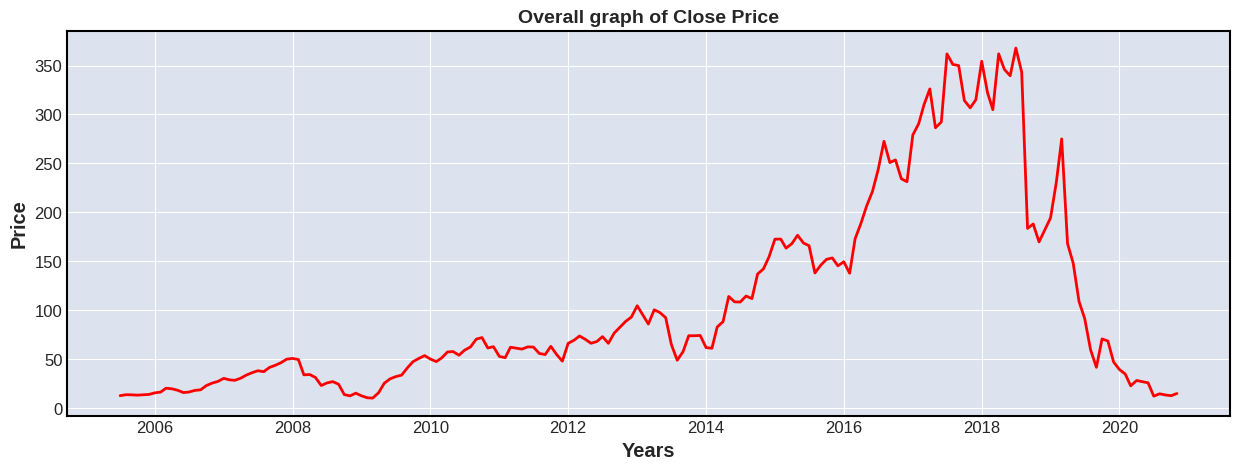

In [342]:
# Chart 6 - Visualization code for to get the line graph for Close price
close_df = df['Close']
plt.figure(figsize=(15,5))
plt.plot(close_df,color = 'r')
plt.xlabel('Years')
plt.ylabel('Price')
plt.title("Overall graph of Close Price",fontsize=14,fontweight='bold')

##### 1. Why did you pick the specific chart?

*  I picked this specific chart to get overall Line chart of the Close price.

##### 2. What is/are the insight(s) found from the chart?

1.  From this chart we can clearly see that the Bulls are getting exhausted in between July 2017 to July 2018 forming multiple tops in between 370 to 350 price point

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are not any insights that lead to negative growth.

#### Chart - 7 - Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

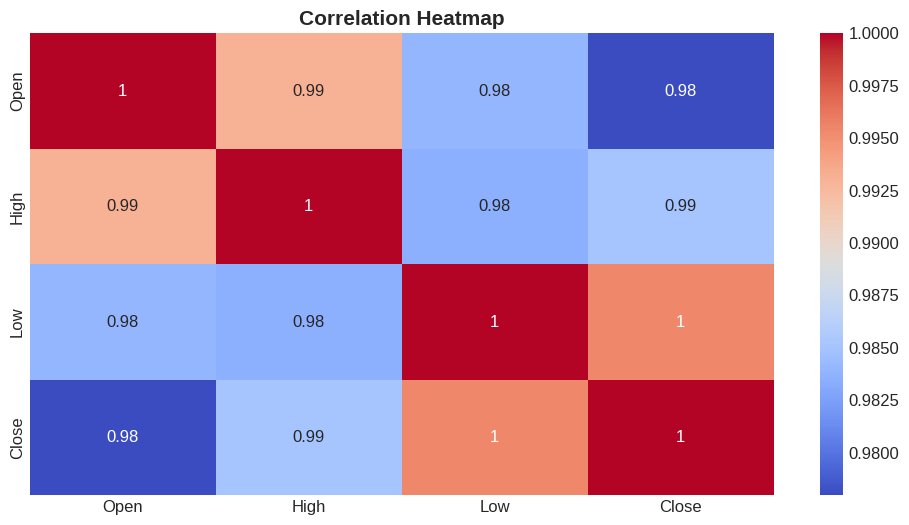

In [311]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,6))
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap",fontweight='bold',fontsize=15)

##### 1. Why did you pick the specific chart?

*  I picked this chart was chosen to visualise the Heatmap between Close, Open,High, Low prices.

##### 2. What is/are the insight(s) found from the chart?

1.  By understanding the chart we can say that the relation between low and close is the highest, followed by high and close, and least is open and close.

#### Chart - 8 - Pair Plot 

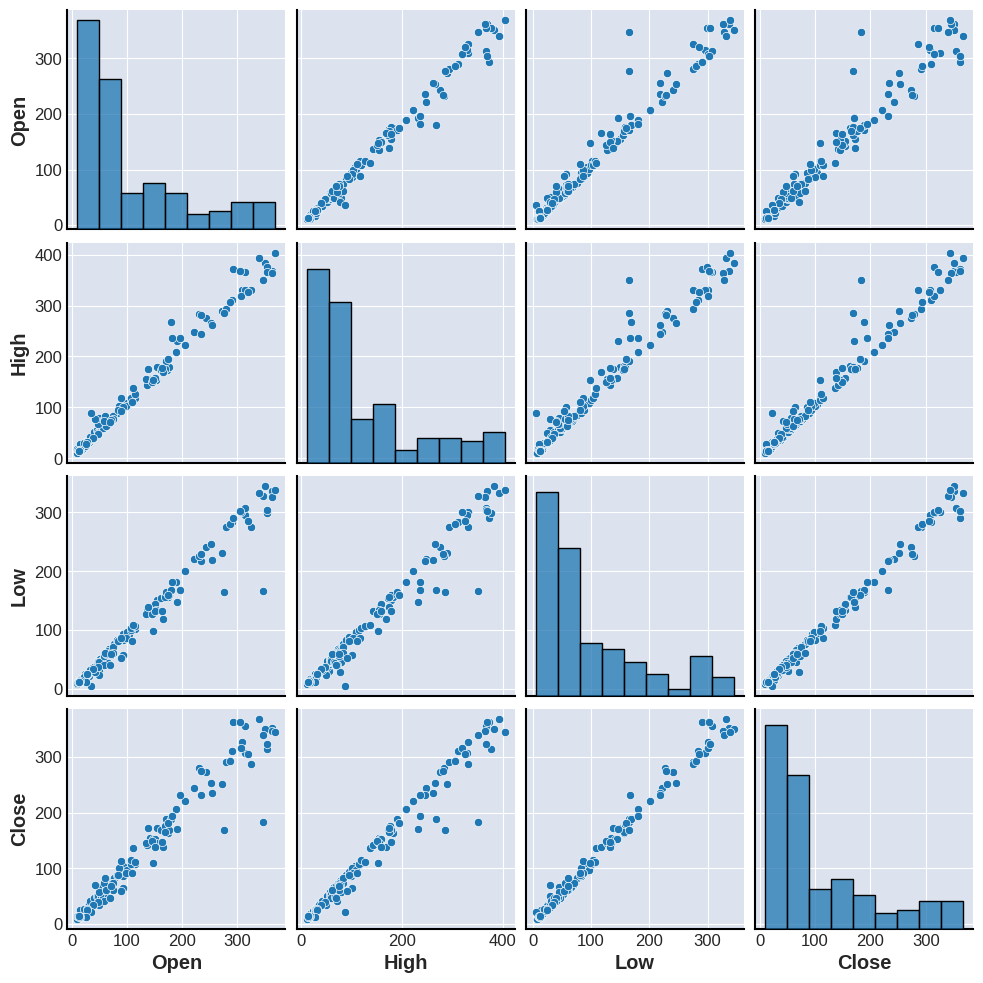

In [312]:
# Pair Plot visualization code
sns.pairplot(data)

##### 1. Why did you pick the specific chart?

*  I picked this specific chart to visualize the Pairplot.

##### 2. What is/are the insight(s) found from the chart?

1. From the Pairplot we can see that our Independent variables are correlated with each other.
2. And there is Linear relarionship between Independent and Dependent variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Feature Manipulation & Selection

#### 1. Feature Selection

In [313]:
# Select your features wisely to avoid overfitting
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

  # Calculating VIF 
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [314]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


##### What all feature selection methods have you used  and why?

I have used VIF method (Variance Inflation Factor).

##### Which all features you found important and why?

1.  Even though we have high VIF scores, we will not perform feature engineering because for this particular case as each feature is important. In the real world, most indicators take into account each of these features to predict future values.

### 2. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

* Yes, we need tranformartion of our data, Because of the data being moderately right skewed we will be using Log transformation for Normal distribution.

In [315]:
# Transform Your data

# Using Log transformation
from scipy.stats import zscore
# Storing the Independent Variables in seperatly
independent_var = ['Open','High','Low']
# Using Log Transformation for Normalizing the IV and DV
x = np.log10(data[independent_var])
y = np.log10(data['Close'])

### 3. Data Splitting

In [316]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why? 

*  We used Train test split. A split of 80-20 % is done on Trian and Test respectively, beacuse normally its considered to be optimum split.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression

In [317]:
# ML Model - 1 Implementation
reg = LinearRegression()
# Fit the Algorithm
reg.fit(X_train,y_train)
# Predict on the model
y_pred = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [318]:
# Visualizing evaluation Metric Score chart
mse = mean_squared_error(10**(y_test),10**(y_pred))  # 10** to convert back log10 that we used while making it normalis
rsme = np.sqrt(mse)

r2=r2_score(10**(y_test),10**(y_pred))
Adjusted_R2=(1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

In [319]:
# Creating DataFrame for Evaluation score
evaluation = pd.DataFrame([mse,rsme,r2,Adjusted_R2,mae],columns=['Linear'],index=['MSE','RMSE','r2','Adj_r2','MAE'])
evaluation

,Linear
MSE,70.420406
RMSE,8.391687
r2,0.993744
Adj_r2,0.993175
MAE,0.017328


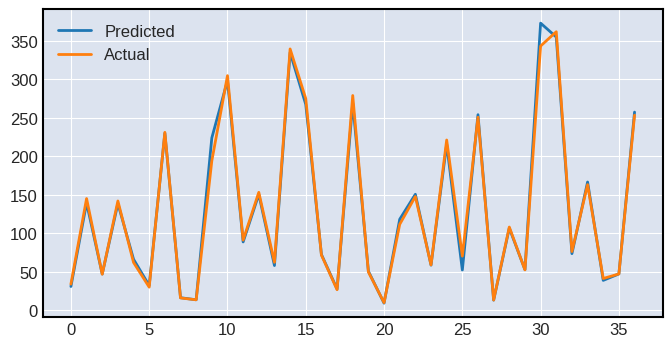

In [320]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,4))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(['Predicted','Actual'])
plt.show()

### ML Model - 2 - Linear Regression using Lasso Regularization.

In [321]:
# Importing the Library
from sklearn.linear_model import Lasso
# ML Model - 2 - Implementation
lasso = Lasso(alpha=0.1)
# Fit the Algorithm
lasso.fit(X_train,y_train)
# Predict on the model
y_pred_l = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [322]:
# Visualizing evaluation Metric Score chart
mse_l=mean_squared_error(10**(y_test),10**(y_pred_l)) #10** to convert back log10 that we used while making it normalised
rmse_l=np.sqrt(mse_l)

r2_l=r2_score(10**(y_test),10**(y_pred_l))
Adjusted_R2_l=(1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

mae_l = mean_absolute_error(y_test, y_pred_l)

In [323]:
eval_l=pd.DataFrame([mse_l,rmse_l,r2_l,Adjusted_R2_l,mae_l],columns=['Lasso'],index=['MSE','RMSE','r2','Adj_r2','MAE'])
evaluation=pd.concat([evaluation,eval_l],axis=1)


In [324]:
evaluation

,Linear,Lasso
MSE,70.420406,8552.042521
RMSE,8.391687,92.477254
r2,0.993744,0.240217
Adj_r2,0.993175,0.171146
MAE,0.017328,0.220050


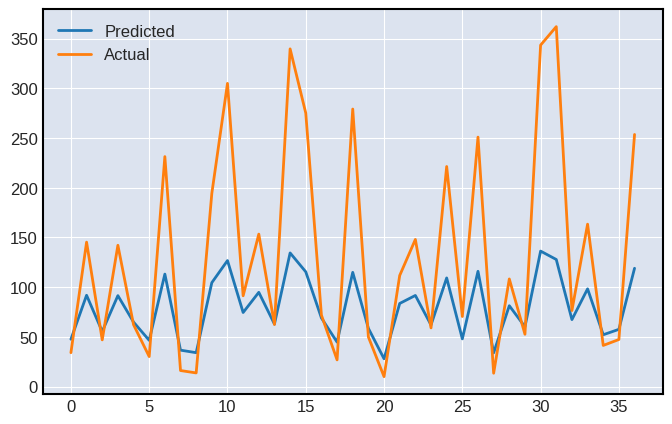

In [325]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_l))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [326]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=3)
# Fit the Algorithm
lasso_reg.fit(X_train,y_train)
# Predict on the model
y_pred_lcv = lasso_reg.predict(X_test)

In [327]:
print("The best fit alpha value is found out to be :",lasso_reg.best_params_)
print("Using ",lasso_reg.best_params_, "the negative mean squarred error is :",lasso_reg.best_score_)


The best fit alpha value is found out to be : {'alpha': 1e-05}
Using  {'alpha': 1e-05} the negative mean squarred error is : -0.001303609483074943


In [328]:
mse_lcv=mean_squared_error(10**(y_test),10**(y_pred_lcv))  # 10** to convert back log10 that we used while making it normalised
rmse_lcv=np.sqrt(mse_lcv)

r2_lcv=r2_score(10**(y_test),10**(y_pred_lcv))
Adjusted_R2_lcv=(1-(1-r2_score(10**(y_test), 10**(y_pred_lcv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

mae_lcv = mean_absolute_error(y_test, y_pred_lcv)

In [329]:
eval_lcv=pd.DataFrame([mse_lcv,rmse_lcv,r2_lcv,Adjusted_R2_lcv,mae_lcv],columns=['Lasso CV'],index=['MSE','RMSE','r2','Adj_r2','MAE'])
evaluation=pd.concat([evaluation,eval_lcv],axis=1)

evaluation

,Linear,Lasso,Lasso CV
MSE,70.420406,8552.042521,70.224612
RMSE,8.391687,92.477254,8.380013
r2,0.993744,0.240217,0.993761
Adj_r2,0.993175,0.171146,0.993194
MAE,0.017328,0.220050,0.017386


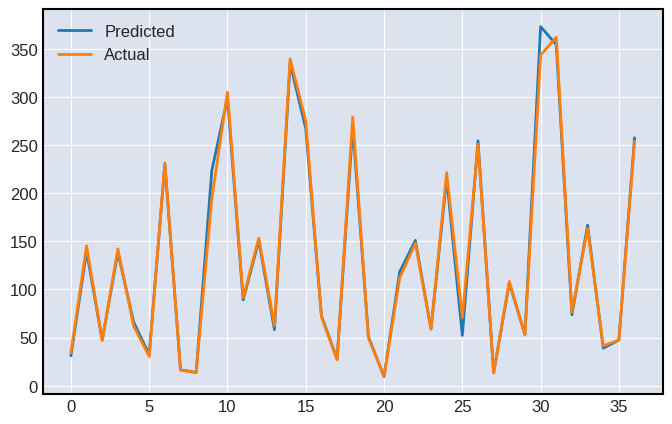

In [330]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lcv))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

*  Here I have used GridSearch CV for Optimization.Because our dataset is very small and GridSearch CV works very well on the Small dataset,

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

1.  Yes,you can see the improvements from above DataFrame.
2.  By looking at above Dataframe we can say that our linear regression with lasso regularization is doing better compare to all others.

### ML Model - 3 - Linear Regression with Ridge Regularization.

In [331]:
# Importing the Library
from sklearn.linear_model import Ridge

# ML Model - 3 Implementation
ridge = Ridge()

# Fit the Algorithm
ridge.fit(X_train,y_train)
# Predict on the model
y_pred_R = ridge.predict(X_test)

In [332]:
mse_R=mean_squared_error(10**(y_test),10**(y_pred_R))  # 10** to convert back log10 that we used while making it normalised
rmse_R=np.sqrt(mse_R)

r2_R=r2_score(10**(y_test),10**(y_pred_R))
Adjusted_R2_R=(1-(1-r2_score(10**(y_test), 10**(y_pred_R)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

mae_R = mean_absolute_error(y_test, y_pred_R)

In [333]:
eval_R=pd.DataFrame([mse_R,rmse_R,r2_R,Adjusted_R2_R,mae_R],columns=['Ridge'],index=['MSE','RMSE','r2','Adj_r2','MAE'])
evaluation=pd.concat([evaluation,eval_R],axis=1)

evaluation

,Linear,Lasso,Lasso CV,Ridge
MSE,70.420406,8552.042521,70.224612,166.335296
RMSE,8.391687,92.477254,8.380013,12.897104
r2,0.993744,0.240217,0.993761,0.985222
Adj_r2,0.993175,0.171146,0.993194,0.983879
MAE,0.017328,0.220050,0.017386,0.023654


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

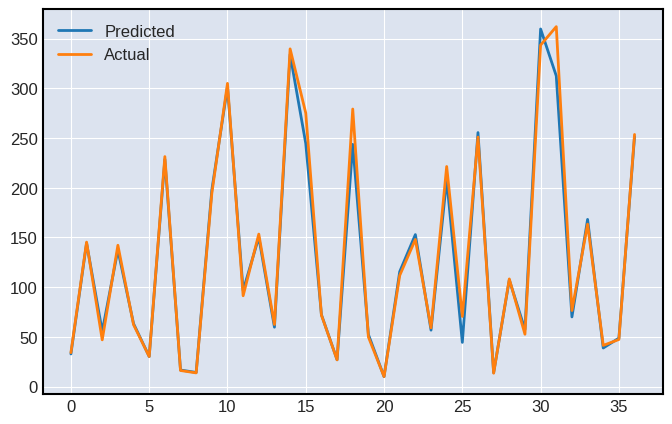

In [334]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_R))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [335]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=3)

# Fit the Algorithm
ridge_reg.fit(X_train,y_train)
# Predict on the model
y_pred_RCV = ridge_reg.predict(X_test)

In [336]:
mse_RCV=mean_squared_error(10**(y_test),10**(y_pred_RCV))  # 10** to convert back log10 that we used while making it normalised
rmse_RCV=np.sqrt(mse_RCV)

r2_RCV=r2_score(10**(y_test),10**(y_pred_R))
Adjusted_R2_RCV=(1-(1-r2_score(10**(y_test), 10**(y_pred_RCV)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

mae_RCV = mean_absolute_error(y_test, y_pred_RCV)

In [337]:
eval_RCV=pd.DataFrame([mse_RCV,rmse_RCV,r2_RCV,Adjusted_R2_RCV,mae_RCV],columns=['Ridge CV'],index=['MSE','RMSE','r2','Adj_r2','MAE'])
evaluation=pd.concat([evaluation,eval_RCV],axis=1)

evaluation

,Linear,Lasso,Lasso CV,Ridge,Ridge CV
MSE,70.420406,8552.042521,70.224612,166.335296,69.969639
RMSE,8.391687,92.477254,8.380013,12.897104,8.364786
r2,0.993744,0.240217,0.993761,0.985222,0.985222
Adj_r2,0.993175,0.171146,0.993194,0.983879,0.993219
MAE,0.017328,0.220050,0.017386,0.023654,0.017567


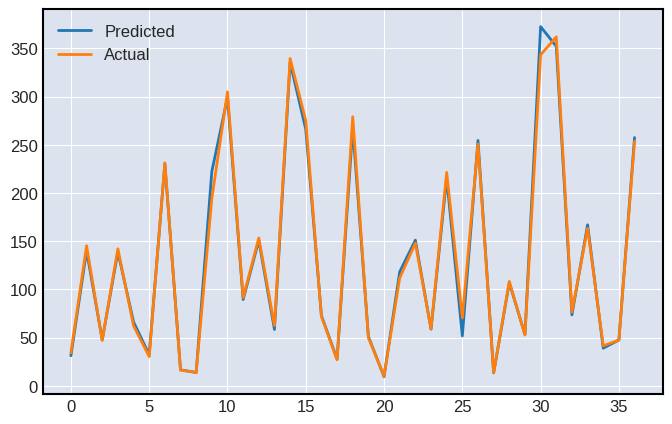

In [338]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_RCV))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

*  Here I have used GridSearch CV for Optimization.Because our dataset is very small and GridSearch CV works very well on the Small dataset,

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

1.  Yes,you can see the improvements from above DataFrame.
2.  By looking at above Dataframe we can say that our linear regression with Ridge regularization is doing better compare to all others.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* Here we consider Mean Squared Error (MSE) and Adjacent R2 (Adj R2) as evalution metrics. 
MSE and Adj R2 as evaluation metrics can have the following positive impacts:
 1. Improved accuracy of predictions: By optimizing a model's performance based  on MSE and Adj R2, businesses can improve the accuracy of their predictions.  This can lead to better decision-making, improved resource allocation, and  reduced costs associated with errors or inefficiencies.
 2. Improved model selection: By comparing the performance of different models  based on MSE and Adj R2, businesses can select the best model for their  specific problem. This can lead to improved performance and better outcomes for  the business.

* Overall, using MSE and Adj R2 as evaluation metrics can help businesses improve the accuracy of their predictions, gain insights into their data and make better decisions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

* So, as we decided our evalution metrics as MSE and Adj R2, On the basis of that we choosed our ML model as **Ridge CV**. 

* We choose **RidgeCV** to estimate the optimal value of the regularization parameter alpha and to ensure that our model is less likely to overfit the training data. By using cross-validation to estimate the optimal value of alpha, we can build a more robust and generalizable model that can perform well on new data.

# **Conclusion**

1. From the dataset or Heatmap it is clear that, there is a **High-Correlationship** between **Independent Variables** and the **Dependent Variable**.
2. After plotting Histograms it is clear that our dataset was **Positively Skewed**.So we applied **Log Transformation** for the Transformation of the data.
2. After applying Linear Regression, Lasso, Lasso with Cross Validation, Ridge, Ridge with Cross Validation. We chooed the **Ridge with Cross Validation** ML model.Because it gives the Very High Accuracy among the all models mentioned above.
3. We choosed **Ridge CV** as a best model with the Accuracy of **99.32%**.
4. After that we visualise the performance of our **Ridge CV** model and the graph shows that we achieved the almost **Best Fit Model** for our dataset,

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***